## Introduction
In workspaces like this one, you will be able to practice visualization techniques you've seen in the course materials. In this particular Jupyter Notebook, you'll practice creating single-variable plots for categorical data.

The cells where you are expected to contribute, are highlighted with **TO DO** markdown. 

In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# The `solutions_univ.py` is a Python file available in the Notebook server that contains solution to the TO DO tasks.
# The solution to each task is present in a separate function in the `solutions_univ.py` file. 
# Do not refer to the file untill you attempt to write code yourself. 
from solutions_univ import bar_chart_solution_1, bar_chart_solution_2

## About the Dataset
In this workspace, you'll be working with the dataset comprised of attributes of creatures in the video game series Pokémon. The data was assembled from the database of information found in this [GitHub repository](https://github.com/veekun/pokedex/tree/master/pokedex/data/csv).

In [2]:
pokemon = pd.read_csv('./data/pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


### **TO DO Task 1** 
1. Explore the `pokemon` dataframe, and try to understand the significance of each of its column.
1. There have been quite a few Pokémon introduced over the series' history. Display the count of Pokémon introduced in each generation? Create a _bar chart_ of these frequencies using the 'generation_id' column.

In [3]:
bars_color = sb.color_palette()[0]

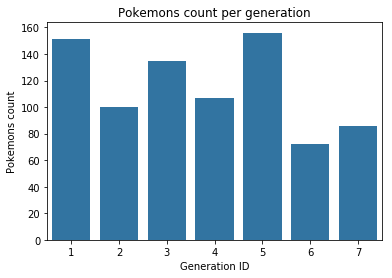

In [4]:
# YOUR CODE HERE

sb.countplot(data=pokemon,x="generation_id", color=bars_color)

plt.xlabel("Generation ID")
plt.ylabel("Pokemons count")
plt.title("Pokemons count per generation");

Another way to do the same thing

In [5]:
pokemon.groupby("generation_id").count()             

,id,species,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
generation_id,,,,,,,,,,,,,
1,151,151,151,151,151,151,67,151,151,151,151,151,151
2,100,100,100,100,100,100,49,100,100,100,100,100,100
3,135,135,135,135,135,135,66,135,135,135,135,135,135
4,107,107,107,107,107,107,53,107,107,107,107,107,107
5,156,156,156,156,156,156,74,156,156,156,156,156,156
6,72,72,72,72,72,72,41,72,72,72,72,72,72
7,86,86,86,86,86,86,55,86,86,86,86,86,86


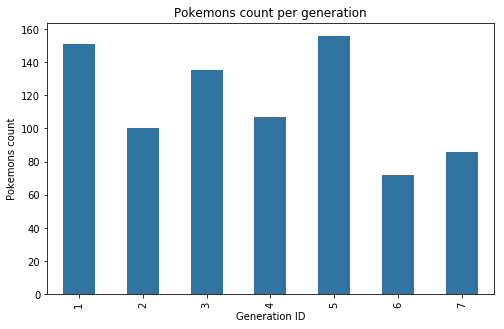

In [6]:
pokemon.groupby("generation_id")  \
       .count()   \
       .iloc[:,1]  \
       .plot(kind="bar", color="#3274A1", figsize=(8,5))

plt.xlabel("Generation ID")
plt.ylabel("Pokemons count")
plt.title("Pokemons count per generation");

### Expected Output: TO DO Task 1

Once you've created your chart, run the cell below to check the output from our solution. **Your visualization does not need to be exactly the same as ours, but it should be able to come up with the same conclusions.**

I used seaborn's countplot function to generate this chart. I also added an additional argument so that each bar has the same color.


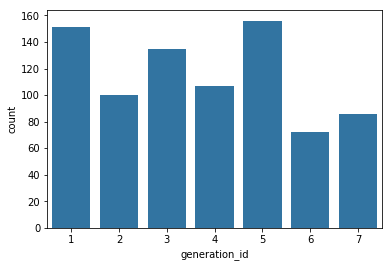

In [7]:
# The function below has been defined in the `solutions_univ.py` file, that you can refer only when necessary. 
# This function contains the expected solution. 
bar_chart_solution_1()

### **TO DO Task 2** 
1. Each Pokémon species has either `type_1`, `type_2` or both `types` that play a part in its offensive and defensive capabilities. The code below creates a new dataframe `pkmn_types` that club the rows of both `type_1` and `type_2`, so that the resulting dataframe has **new** column, `type_level`. 

**Display, how frequent is each type?**



The function below will do the following in the pokemon dataframe *out of place*:
1. Select the 'id', and 'species' columns from pokemon. 
2. Remove the 'type_1', 'type_2' columns from pokemon
3. Add a new column 'type_level' that can have a value either 'type_1' or 'type_2'
4. Add another column 'type' that will contain the actual value contained in the 'type_1', 'type_2' columns. For example, the first row in the pokemon dataframe having `id=1`	and `species=bulbasaur` will now occur twice in the resulting dataframe after the `melt()` operation. The first occurrence will have `type=grass`, whereas, the second occurrence will have `type=poison`.

In [8]:
pkmn_types = pokemon.melt(id_vars = ["id","species"], 
                          value_vars = ["type_1", "type_2"], 
                          var_name = "type_level", value_name = "type").dropna()
pkmn_types.head()

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


In [9]:
# YOUR CODE HERE
pkmn_types["type"].value_counts()

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

2. Your task is to use this dataframe to create a _relative frequency_ plot of the proportion of Pokémon with each type, _sorted_ from most frequent to least. **Hint**: The sum across bars should be greater than 100%, since many Pokémon have two types. Keep this in mind when considering a denominator to compute relative frequencies.

1212
131
0.108085808581
[ 0.    0.02  0.04  0.06  0.08  0.1 ]
['0.0', '0.02', '0.04', '0.06', '0.08', '0.1']
Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'ground', 'fire', 'rock', 'fighting', 'electric', 'fairy', 'steel',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')


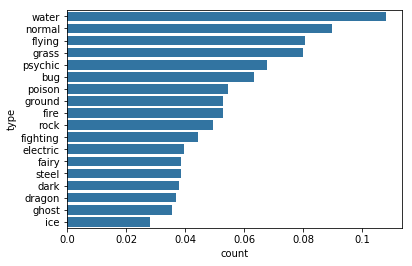

In [10]:
# YOUR CODE HERE
total_count = pkmn_types["type"].value_counts().sum()
print(total_count)

max_type_count = pkmn_types["type"].value_counts()[0]
print(max_type_count)

max_proportion = max_type_count/total_count
print(max_proportion)

ticks = np.arange(0,max_proportion,0.02)
print(ticks)

ticks_label = [str(val) for val in ticks ]
print(ticks_label)

ticks_index = pkmn_types["type"].value_counts().index
print(ticks_index)

#plt.xticks(rotation=90)
plt.xticks(ticks*total_count,ticks_label)
#sb.countplot(data=pkmn_types,x="type",order=ticks_index)
sb.countplot(data=pkmn_types,y="type",order=ticks_index, color=bars_color);

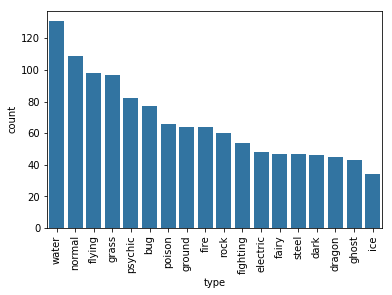

In [11]:
plt.xticks(rotation=90)
sb.countplot(data=pkmn_types,x="type",order=ticks_index, color=sb.color_palette()[0]);

**Another way to plot the frequency of the pokemon types**

In [12]:
random_state = 42 # seed for random number generator, in order to have experience-reproducibility
pkmn_types.sample(5,random_state=random_state)

,id,species,type_level,type
801,802,marshadow,type_1,fighting
677,678,meowstic,type_1,psychic
43,44,gloom,type_1,grass
1197,391,monferno,type_2,fighting
70,71,victreebel,type_1,grass


In [13]:
pkmn_types.groupby("type").count()

,id,species,type_level
type,,,
bug,77,77,77
dark,46,46,46
dragon,45,45,45
electric,48,48,48
fairy,47,47,47
fighting,54,54,54
fire,64,64,64
flying,98,98,98
ghost,43,43,43


In [14]:
pkmn_count_per_type =  pkmn_types.groupby("type") \
                                 .count()  \
                                 .iloc[:,1]  \
                                 .sort_values(ascending=False)

pkmn_count_per_type

type
water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
steel        47
fairy        47
dark         46
dragon       45
ghost        43
ice          34
Name: species, dtype: int64

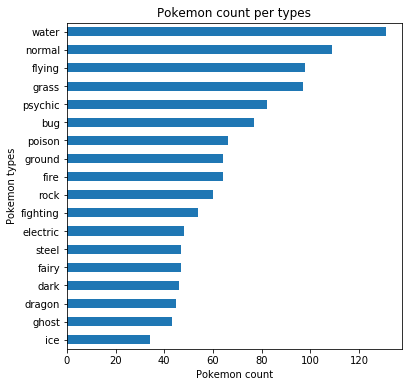

In [15]:
# Plotting the pokemon count by type
pkmn_count_per_type.sort_values(ascending=True)  \
                   .plot(kind="barh", color= sb.color_palette()[0], figsize=(6,6) );
 
plt.xlabel("Pokemon count")
plt.ylabel("Pokemon types")
plt.title("Pokemon count per types");

In [16]:
total_count = pkmn_types["type"].value_counts().sum()
total_count

1212

In [17]:
max_type_count = pkmn_types["type"].value_counts()[0]
print(max_type_count)

max_proportion = max_type_count/total_count
print(max_proportion)

131
0.108085808581


In [18]:
ticks = np.arange(0,max_proportion,0.02)
print(ticks)

ticks_label = [str(val) for val in ticks ]
print(ticks_label)

[ 0.    0.02  0.04  0.06  0.08  0.1 ]
['0.0', '0.02', '0.04', '0.06', '0.08', '0.1']


In [19]:
pkmn_types["type"].value_counts()

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [20]:
ticks_index = pkmn_count_per_type.index # pkmn_types["type"].value_counts().index
ticks_index

Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'ground', 'fire', 'rock', 'fighting', 'electric', 'steel', 'fairy',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object', name='type')

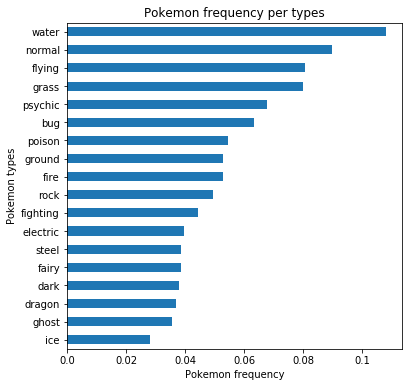

In [21]:
plt.xticks(ticks*total_count,ticks_label)
# sb.countplot(data=pkmn_types,y="type",order=ticks_index, color=bars_color);
pkmn_count_per_type.sort_values(ascending=True).plot(kind="barh", color=sb.color_palette()[0], figsize=(6,6))

plt.xlabel("Pokemon frequency")
plt.ylabel("Pokemon types")
plt.title("Pokemon frequency per types");

### Expected Output: TO DO Task 2

I created a horizontal bar chart since there are a lot of Pokemon types. The unique() method was used to get the number of different Pokemon species. I also added an xlabel call to make sure it was clear the bar length represents a relative frequency.


The frequency of each type is:
 type_1    807
type_2    405
Name: type_level, dtype: int64


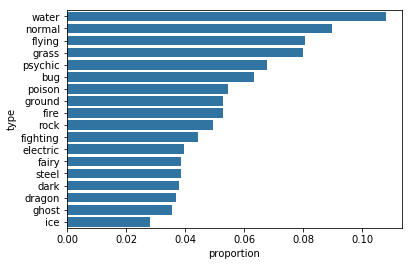

In [22]:
# The function below has been defined in the `solutions_univ.py` file, that you can refer only when necessary. 
# This function contains the expected solution. 
bar_chart_solution_2()

If you're interested in seeing the code used to generate the solution plots, you can find it in the `solutions_univ.py` script in the workspace folder. You can navigate there by clicking on the Jupyter icon in the upper left corner of the workspace. Spoiler warning: the script contains solutions for all of the workspace exercises in this lesson, so take care not to spoil your practice!